<a href="https://colab.research.google.com/github/Vaibhavmane7840/30-Days-Of-Python/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[:,1 :-1].values
y = dataset.iloc[: , -1].values 

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1)

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y= StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [17]:
scaler_y.inverse_transform(regressor.predict(scaler_X.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

## Visualising the SVR results

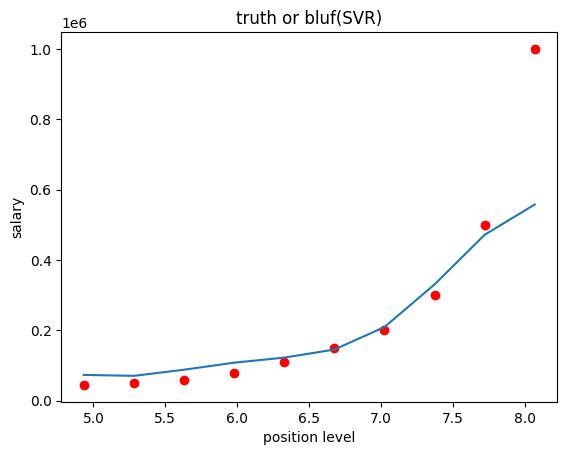

In [19]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red' )
plt.plot(scaler_X.inverse_transform(X) ,scaler_y.inverse_transform(regressor.predict(X).reshape(-1,1))) 
plt.title('truth or bluf(SVR)')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

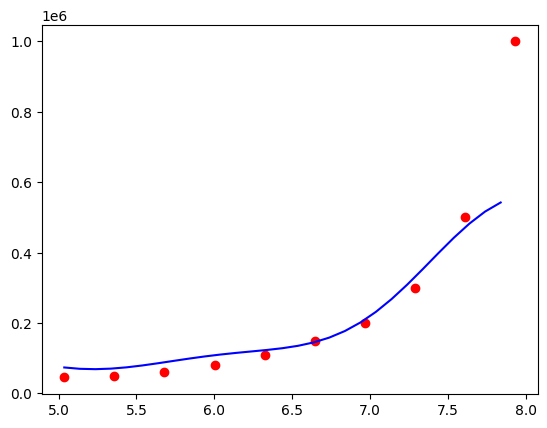

In [25]:
X_grid = np.arange(min(scaler_X.inverse_transform(X)), max(scaler_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler_X.inverse_transform(X),scaler_y.inverse_transform(y) , color = 'red')
plt.plot(X_grid ,scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid)).reshape(-1,1)),color = 'blue')
plt.show()